In [1]:
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from kooplearn.datasets import LogisticMap
logistic = LogisticMap(N = 20, rng_seed=0)

In [2]:
#List and unpickle all files in "results/"
reports = []
for file in os.listdir("results/"):
    if file.endswith(".pkl"):
        with open("results/"+file, "rb") as f:
            reports.append(pickle.load(f))

def get_series(report, key):
    report = deepcopy(report)
    model_name = report.pop("name")
    series = np.zeros(len(report))
    for k, v in report.items():
        idx = int(k.split('_')[0]) - 2
        series[idx] = v.get(key, 0)
    feature_dims = np.arange(len(report)) + 2
    return feature_dims, series, model_name

def get_eigs(report):
    report = deepcopy(report)
    model_name = report.pop("name")
    eigs = []
    for k, v in report.items():
        idx = int(k.split('_')[0]) - 2
        eigs.append(v['eigenvalues'])
    feature_dims = np.arange(len(report)) + 2
    return feature_dims, eigs, model_name

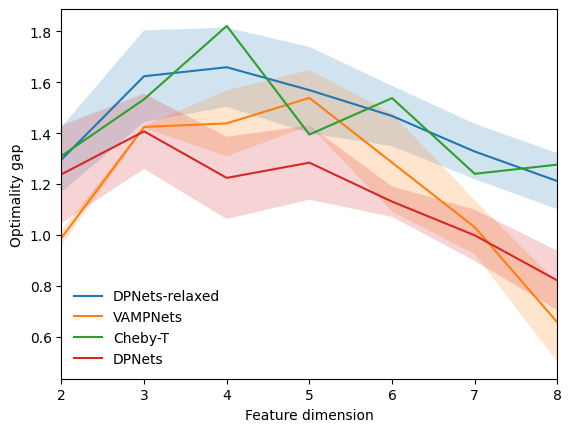

In [10]:
fig, ax = plt.subplots()
for report in reports:
    x, y, model_name = get_series(report, "optimality-gap")
    _, dy, _ = get_series(report, "optimality-gap_std")
    ax.plot(x, y, label=model_name)
    ax.fill_between(x, y - dy, y + dy, alpha=0.2)
ax.set_xlabel("Feature dimension")
ax.set_ylabel("Optimality gap")
ax.set_xmargin(0)
ax.legend(frameon=False)

In [11]:
def plot_eigs(reports, feature_idx):
    fig, ax = plt.subplots(figsize=(5, 5))  
    #Activate grid
    ax.grid(True, which='both')
    #Plot unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='k', lw=0.75)   
    for report in reports:
        x, eigs, model_name = get_eigs(report)
        eigs = eigs[feature_idx]
        print(f"{model_name} eigenvalues: {eigs}")
        ax.scatter(eigs.real, eigs.imag, label = model_name)
    ax.scatter(logistic.eig().real, logistic.eig().imag, marker='x', color='k', label = 'True eigenvalues')
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    ax.legend(frameon=False, loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=8)
    ax.set_aspect('equal')

DPNets-relaxed eigenvalues: [ 0.99822715+0.j          0.10615224+0.12537407j  0.10615224-0.12537407j
 -0.21573288+0.09320081j -0.21573288-0.09320081j -0.12958215+0.j        ]
VAMPNets eigenvalues: [ 0.99886303+0.j          0.21681276+0.j         -0.2689173 +0.j
 -0.14447529+0.15468191j -0.14447529-0.15468191j -0.00758691+0.j        ]
Cheby-T eigenvalues: [ 1.        +0.j         -0.25571645+0.j         -0.07422826+0.18655354j
 -0.07422826-0.18655354j  0.00148494+0.j          0.02788005+0.j        ]
DPNets eigenvalues: [ 0.99901965+0.j         -0.22327348+0.18306301j -0.22327348-0.18306301j
  0.10466486+0.j          0.00254539+0.00908532j  0.00254539-0.00908532j]


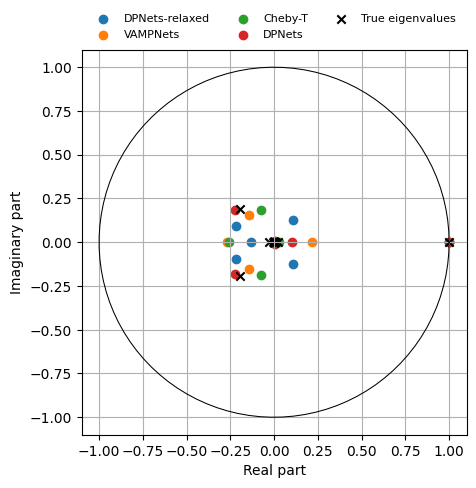

In [13]:
plot_eigs(reports, 4)